<a href="https://colab.research.google.com/github/MikeXL/brain/blob/master/iris_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html


In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [48]:
print(torch.__version__)
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.0.0.dev20181102
1.14.6
0.22.0
2.1.2


In [0]:
model = nn.Sequential(
  nn.Linear(4,12),
  nn.ReLU(),
  nn.Linear(12, 3), 
  nn.Softmax(1)
)

In [49]:
model

Sequential(
  (0): Linear(in_features=4, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=3, bias=True)
  (3): Softmax()
)

In [0]:
lf = nn.CrossEntropyLoss()
optim = torch.optim.LBFGS(model.parameters(), lr=.1)

In [10]:
optim


LBFGS (
Parameter Group 0
    history_size: 100
    line_search_fn: None
    lr: 0.1
    max_eval: 25
    max_iter: 20
    tolerance_change: 1e-09
    tolerance_grad: 1e-05
)

In [0]:
from sklearn import datasets
iris=datasets.load_iris()

In [26]:
iris.target[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
def train(model, Y, X, optim, lf, epoch=200):
  for _ in range(epoch):
    def closure():
      yhat = model(X)
      optim.zero_grad()
      l = lf(yhat, Y)
      print(l.item())
      l.backward()
      return l
    optim.step(closure)
  


In [0]:

train(model, torch.from_numpy(iris.target).long(), torch.from_numpy(iris.data).float(), optim, lf, 200)   

In [0]:
with torch.no_grad():
  pred = model(torch.from_numpy(iris.data).float())
  l = lf(pred, torch.from_numpy(iris.target).long())
  

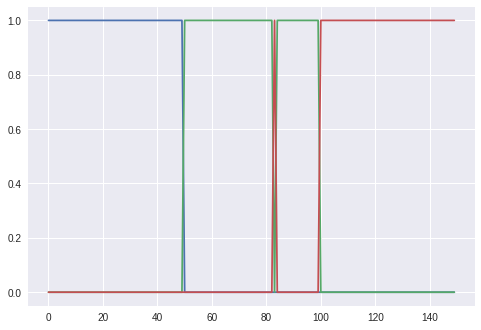

In [41]:
plt.plot(pred.data.numpy())

In [0]:
out=model(torch.from_numpy(iris.data).float())
_, p = torch.max(out, 1)

In [45]:
p

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])